In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
df = pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


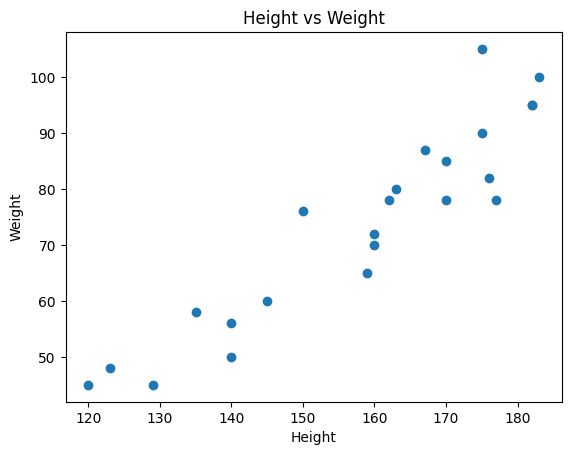

In [6]:
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.show()

In [7]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


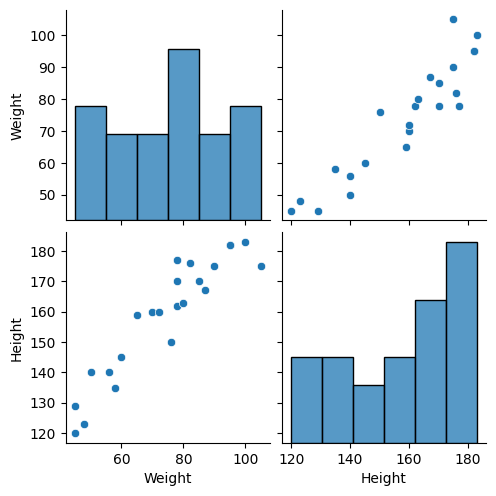

In [8]:
sns.pairplot(df)

In [ ]:
#Defining the dependent and independent features
X = df[['Weight']] #Independent feature should be in the form of 2D of DataFrame or in 2D array
y = df['Height']  #Dependent feature can be in the form of 1D of Series or in 1D array
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [13]:
# Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17, 1), (6, 1), (17,), (6,))

In [15]:
#standardarization
from sklearn.preprocessing import StandardScaler

In [16]:
scalar = StandardScaler()
X_train=scalar.fit_transform(X_train)

In [17]:
X_test=scalar.transform(X_test) 

In [18]:
# Appalying Linear Regression
from sklearn.linear_model import LinearRegression

In [21]:
regression = LinearRegression(n_jobs=-1)

In [22]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [23]:
regression.coef_, regression.intercept_

(array([17.2982057]), np.float64(156.47058823529412))

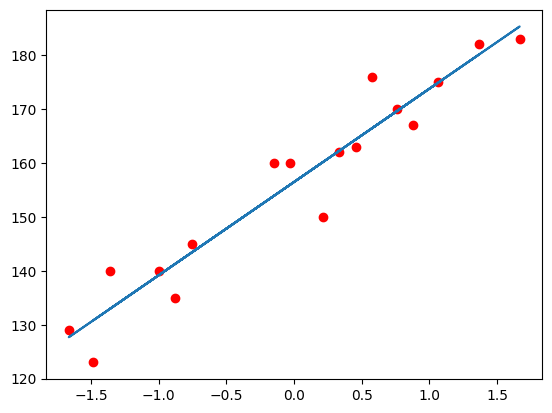

In [26]:
#With respect to traiining data plot best fit line
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regression.predict(X_train))

In [28]:
# Predicting the Test data
y_pred = regression.predict(X_test)
# Basically it will work like this y_pred = 17.29*X_test + 156.470

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mse, mae, r2, rmse

(114.84069295228699,
 9.66512588679501,
 0.7360826717981276,
 np.float64(10.716374991212605))

In [32]:
# Adjusted R2 score
1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

## OLS Linear regression

In [33]:
import statsmodels.api as sm

In [35]:
model = sm.OLS(y_train, X_train).fit()

In [36]:
prediction = model.predict(X_test)

In [37]:
prediction

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [38]:
model.summary()

c:\Users\ruchi\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Tue, 07 Oct 2025   Prob (F-statistic):                       0.664
Time:                        18:40:43   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.2982     39.138      0.442      0.664     -65.671     100.267
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.203
Skew:                          -0.166   Prob(JB):                        0.904
Kurtosis:                       2.581   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Prediction for new data
new_data = scalar.transform([[150], [200], [250],[72]])
regression.predict(new_data)

c:\Users\ruchi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([237.71559913, 290.11185046, 342.50810179, 155.97744705])